In [2]:
import pandas as pd # to work with datasets
import numpy as np # to make use of math livraries
import matplotlib.pyplot as plt # for graphs
import seaborn as sns # for visualizations

In [4]:
#importing the loan dataset
loan=pd.read_csv("loan.csv")

/Users/gokul.gs1/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
#checking shape of the dataset
loan.shape

(39717, 111)

In [6]:
#previewing the imported data
loan.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
#dropping rows with emp_length is "NA"
loan_1=loan[loan["emp_length"].isna()==False]

In [8]:
loan_1.shape

(38642, 111)

In [10]:
#dropping columns with NA values
loan_2=loan_1.dropna(axis=1)

In [11]:
#checking shape again
loan_2.shape

(38642, 44)

In [12]:
#checking for duplicate entries on member IDs
loan_2["member_id"].duplicated().sum()

0

In [13]:
#checking for null lvalues in loan funded amt
loan_2["funded_amnt_inv"].isnull().sum()

0

In [14]:
#checking for the spread of data
loan_2.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,acc_now_delinq,delinq_amnt
count,3.864200e+04,3.864200e+04,38642.000000,38642.000000,38642.000000,38642.000000,3.864200e+04,38642.000000,38642.000000,38642.000000,...,38642.000000,38642.000000,38642.000000,38642.000000,38642.000000,38642.000000,38642.000000,38642.0,38642.0,38642.0
mean,6.810404e+05,8.476593e+05,11291.615988,11017.101211,10455.452667,326.760477,6.960828e+04,13.325108,0.146887,0.870141,...,11644.732743,9864.642383,2281.811391,1.371686,95.690014,12.451601,2702.143340,1.0,0.0,0.0
std,2.113045e+05,2.667796e+05,7462.136215,7193.038828,7139.613641,209.143908,6.425320e+04,6.666902,0.492543,1.069834,...,8961.629963,7076.051319,2615.479073,7.331759,694.502239,149.829161,4467.667797,0.0,0.0,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0
25%,5.134350e+05,6.628632e+05,5500.000000,5500.000000,5000.000000,168.442500,4.140000e+04,8.200000,0.000000,0.000000,...,5177.300000,4750.000000,671.752500,0.000000,0.000000,0.000000,222.005000,1.0,0.0,0.0
50%,6.627705e+05,8.474090e+05,10000.000000,9950.000000,9000.000000,282.830000,6.000000e+04,13.415000,0.000000,1.000000,...,9378.850000,8000.000000,1367.610000,0.000000,0.000000,0.000000,554.700000,1.0,0.0,0.0
75%,8.364912e+05,1.045642e+06,15000.000000,15000.000000,14425.000000,434.397500,8.320000e+04,18.590000,0.000000,1.000000,...,15914.040000,13874.730000,2858.377500,0.000000,0.000000,0.000000,3337.917500,1.0,0.0,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,1.0,0.0,0.0


/Users/gokul.gs1/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

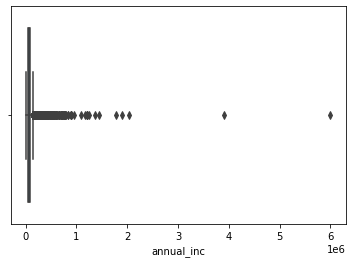

In [15]:
#looking at spread of annual income
sns.boxplot(loan_2["annual_inc"])

In [16]:
income_outliers=loan_2[loan_2["annual_inc"]>120000].index

In [17]:
#dropping records with annual_inc greater than 1200000
loan_3=loan_2.drop(income_outliers)

In [18]:
#checking shape
loan_3.shape

(35391, 44)

/Users/gokul.gs1/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

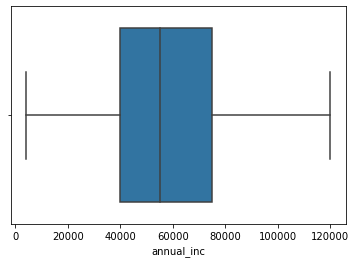

In [19]:
#checking the spread again
sns.boxplot(loan_3["annual_inc"])

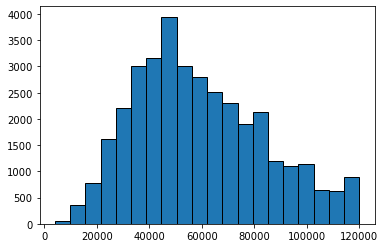

In [35]:
#histogram of annual income
plt.hist(loan_3["annual_inc"],bins=20,edgecolor='k')
plt.show()

/Users/gokul.gs1/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_amnt'>

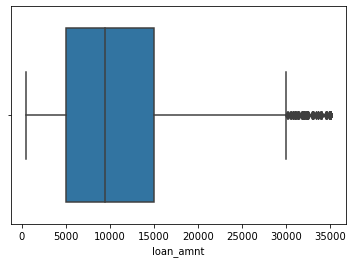

In [20]:
#spread of loan amount
sns.boxplot(loan_3["loan_amnt"])

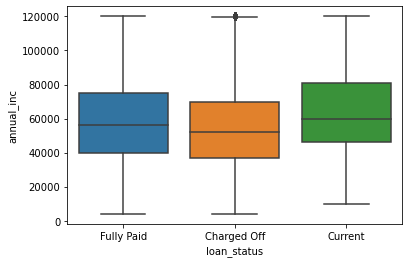

In [21]:
#spread of income across loan status
ax = sns.boxplot(y="annual_inc", x="loan_status", data=loan_3)  
plt.show()


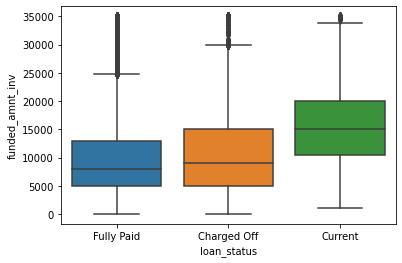

In [22]:
#spread of loan amount across loan status
ax = sns.boxplot(y="funded_amnt_inv", x="loan_status", data=loan_3) 
plt.show()

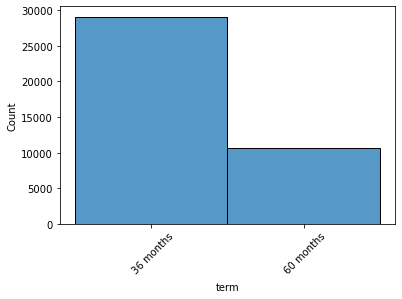

In [28]:
#loan use case by term (we can also look at loan status)
sns.histplot(data=loan_3,x=loan["term"])
plt.xticks(rotation=45)
plt.show()


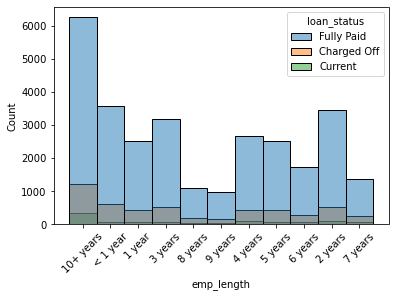

In [132]:
#loans funded by employment length
sns.histplot(data=loan_3,x="emp_length",hue="loan_status")
plt.xticks(rotation=45)
plt.show()

In [63]:
group_1=loan_3.groupby("emp_length").mean()

In [ ]:
#trend of loans funded across the years
sns.lineplot(data=loan_1,x=loan["purpose"],hue="term")



In [68]:
#to understand maximum loans applied for which purpose
loan["purpose"].value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

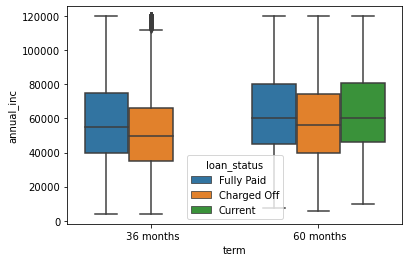

In [190]:
#spread of interest across loan status
ax = sns.boxplot(y="annual_inc", x="term", data=loan_3,hue="loan_status")     
plt.show()

In [37]:
#adding a derived field funded %
loan_3["funded_perc"]=loan_3["funded_amnt_inv"]/loan_3["loan_amnt"]

/Users/gokul.gs1/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


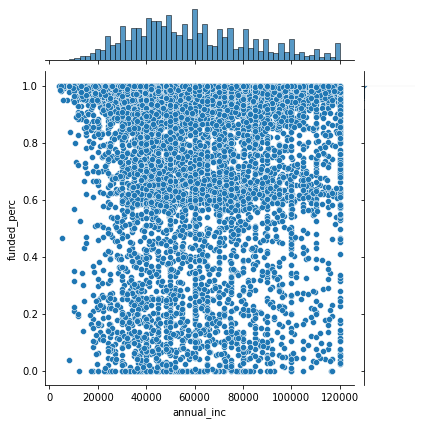

In [62]:
#correlation between annual income and loan funded %
sns.jointplot(loan_3["annual_inc"],loan_3["funded_perc"])

In [64]:
#understanding correlation
corr = loan_3.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

/var/folders/ds/4tq6hf9s3vb3zzq8whnd3nq9q4l_wt/T/ipykernel_27117/2718739257.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(3)
/Users/gokul.gs1/opt/anaconda3/lib/python3.9/site-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/Users/gokul.gs1/opt/anaconda3/lib/python3.9/site-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,acc_now_delinq,delinq_amnt,funded_perc
id,1.000,0.994,0.140,0.151,0.253,0.084,0.047,0.101,-0.008,-0.044,0.022,-0.020,0.013,0.041,0.179,0.179,0.134,0.220,0.106,0.169,-0.063,0.038,-0.010,0.123,nan,nan,nan,0.410
member_id,0.994,1.000,0.139,0.149,0.262,0.078,0.048,0.102,-0.008,-0.049,0.020,-0.019,0.009,0.043,0.169,0.169,0.135,0.229,0.106,0.169,-0.066,0.036,-0.012,0.125,nan,nan,nan,0.453
loan_amnt,0.140,0.139,1.000,0.982,0.937,0.929,0.392,0.103,-0.042,-0.001,0.159,-0.041,0.317,0.234,0.194,0.193,0.878,0.843,0.841,0.728,0.037,0.137,0.070,0.436,nan,nan,nan,-0.105
funded_amnt,0.151,0.149,0.982,1.000,0.955,0.955,0.389,0.102,-0.043,-0.000,0.157,-0.042,0.310,0.228,0.196,0.196,0.894,0.859,0.858,0.736,0.039,0.139,0.072,0.441,nan,nan,nan,-0.036
funded_amnt_inv,0.253,0.262,0.937,0.955,1.000,0.899,0.371,0.110,-0.048,-0.015,0.145,-0.044,0.291,0.222,0.205,0.205,0.871,0.905,0.832,0.728,0.019,0.126,0.058,0.432,nan,nan,nan,0.198
installment,0.084,0.078,0.929,0.955,0.899,1.000,0.387,0.089,-0.030,0.000,0.153,-0.036,0.310,0.206,0.125,0.125,0.848,0.805,0.840,0.632,0.049,0.119,0.072,0.387,nan,nan,nan,-0.053
annual_inc,0.047,0.048,0.392,0.389,0.371,0.387,1.000,-0.064,0.025,0.028,0.260,0.002,0.381,0.381,0.057,0.057,0.368,0.352,0.370,0.261,-0.000,0.035,0.014,0.203,nan,nan,nan,-0.035
dti,0.101,0.102,0.103,0.102,0.110,0.089,-0.064,1.000,-0.033,0.006,0.302,-0.008,0.282,0.253,0.043,0.043,0.101,0.107,0.078,0.131,-0.012,0.025,0.012,0.027,nan,nan,nan,0.030
delinq_2yrs,-0.008,-0.008,-0.042,-0.043,-0.048,-0.030,0.025,-0.033,1.000,0.008,0.014,0.012,-0.066,0.066,-0.007,-0.007,-0.033,-0.039,-0.048,0.011,0.028,0.010,0.011,-0.018,nan,nan,nan,-0.016
inq_last_6mths,-0.044,-0.049,-0.001,-0.000,-0.015,0.000,0.028,0.006,0.008,1.000,0.091,0.026,-0.026,0.107,-0.006,-0.006,-0.021,-0.031,-0.035,0.016,0.032,0.017,0.011,0.022,nan,nan,nan,-0.043


In [148]:
loan_3[loan_3["emp_length"]=="10+ years"]["funded_amnt_inv"].describe()

count     7823.000000
mean     11606.558988
std       7531.108499
min          0.000000
25%       5850.000000
50%      10000.000000
75%      15750.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [66]:
emp_length_status=loan_3[loan_3["emp_length"]=="10+ years"]

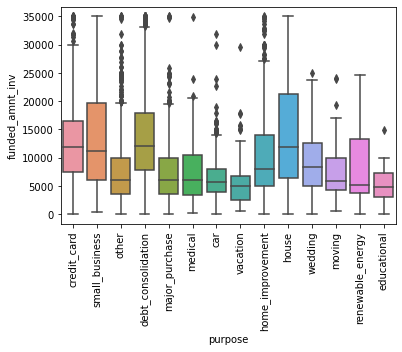

In [67]:
#spread of funded amount by purpose for emp_length 10+years
sns.boxplot(data=emp_length_status,x="purpose",y="funded_amnt_inv")
plt.xticks(rotation=90)
plt.show()

In [57]:
#bukceting annual income 
bins = [0,50000, 75000, 1000000000]
loan_3['income_bucket'] = pd.cut(loan_3["annual_inc"], bins)

In [76]:
#checking if income bucketed
loan_3.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt,funded_perc,income_bucket
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,0.00,0.00,171.62,1,INDIVIDUAL,0,0,0.995,"(0, 50000]"
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,0.00,117.08,1.11,119.66,1,INDIVIDUAL,0,0,1.000,"(0, 50000]"
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,0.00,0.00,649.91,1,INDIVIDUAL,0,0,1.000,"(0, 50000]"
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,16.97,0.00,0.00,357.48,1,INDIVIDUAL,0,0,1.000,"(0, 50000]"
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,0.00,0.00,67.79,1,INDIVIDUAL,0,0,1.000,"(75000, 1000000000]"


In [70]:
#default % by income bucket using pivot
piv_inc_bucket=pd.pivot_table(data=loan_3,index=["income_bucket"],columns=["loan_status"],values=["member_id"],aggfunc="count")

In [72]:
piv_inc_bucket["default%"]=piv_inc_bucket["member_id"]["Charged Off"]/(piv_inc_bucket["member_id"]["Charged Off"]+piv_inc_bucket["member_id"]["Current"]+piv_inc_bucket["member_id"]["Fully Paid"])

In [75]:
piv_inc_bucket

member_id                     default%
loan_status         Charged Off Current Fully Paid          
income_bucket                                               
(0, 50000]                 2438     328      12241  0.162458
(50000, 75000]             1648     348       9810  0.139590
(75000, 1000000000]         968     298       7312  0.112847

In [41]:
#default % by emp_length
piv_emp_length=pd.pivot_table(data=loan_3,index=["emp_length"],columns=["loan_status"],values=["member_id"],aggfunc="count")

In [42]:
piv_emp_length["default%"]=piv_emp_length["member_id"]["Charged Off"]/(piv_emp_length["member_id"]["Charged Off"]+piv_emp_length["member_id"]["Current"]+piv_emp_length["member_id"]["Fully Paid"])

In [43]:
piv_emp_length

member_id                     default%
loan_status Charged Off Current Fully Paid          
emp_length                                          
1 year              435      66       2522  0.143897
10+ years          1228     333       6262  0.156973
2 years             536      86       3458  0.131373
3 years             526      72       3176  0.139375
4 years             433      90       2678  0.135270
5 years             427      78       2530  0.140692
6 years             288      57       1720  0.139467
7 years             245      57       1355  0.147858
8 years             185      40       1109  0.138681
9 years             145      28        964  0.127529
< 1 year            606      67       3589  0.142187

In [44]:
#default % by loan purpose
piv_purpose=pd.pivot_table(data=loan_3,index=["purpose"],columns=["loan_status"],values=["member_id"],aggfunc="count")

In [54]:
piv_purpose["default%"]=piv_purpose["member_id"]["Charged Off"]/(piv_purpose["member_id"]["Charged Off"]+piv_purpose["member_id"]["Current"]+piv_purpose["member_id"]["Fully Paid"])

In [52]:
#removing NaN from pivot table
piv_purpose["member_id"]["Current"] = piv_purpose["member_id"]['Current'].fillna(0)

/var/folders/ds/4tq6hf9s3vb3zzq8whnd3nq9q4l_wt/T/ipykernel_27117/2688529594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  piv_purpose["member_id"]["Current"] = piv_purpose["member_id"]['Current'].fillna(0)


In [55]:
piv_purpose

member_id                     default%
loan_status        Charged Off Current Fully Paid          
purpose                                                    
car                      152.0    49.0     1210.0  0.107725
credit_card              478.0    91.0     4005.0  0.104504
debt_consolidation      2524.0   507.0    13863.0  0.149402
educational               50.0     0.0      252.0  0.165563
home_improvement         290.0    71.0     2019.0  0.121849
house                     52.0    12.0      259.0  0.160991
major_purchase           200.0    33.0     1712.0  0.102828
medical                   95.0     6.0      506.0  0.156507
moving                    81.0     7.0      422.0  0.158824
other                    554.0   106.0     2918.0  0.154835
renewable_energy          17.0     1.0       67.0  0.200000
small_business           427.0    69.0     1087.0  0.269741
vacation                  48.0     3.0      283.0  0.143713
wedding                   86.0    19.0      760.0  0.099422

In [77]:
#default % by term
piv_term=pd.pivot_table(data=loan_3,index=["term"],columns=["loan_status"],values=["member_id"],aggfunc="count")
piv_term["default%"]=piv_term["member_id"]["Charged Off"]/(piv_term["member_id"]["Charged Off"]+piv_term["member_id"]["Current"]+piv_term["member_id"]["Fully Paid"])
piv_term
#default % by interest rate
#defualt % by delinq

member_id                     default%
loan_status Charged Off Current Fully Paid          
term                                                
 36 months       2891.0     NaN    23173.0       NaN
 60 months       2163.0   974.0     6190.0  0.231907

In [86]:
#removing na values in pivot
piv_term = piv_term.fillna(0)
piv_term["default%"]=piv_term["member_id"]["Charged Off"]/(piv_term["member_id"]["Charged Off"]+piv_term["member_id"]["Current"]+piv_term["member_id"]["Fully Paid"])


In [90]:
piv_term

member_id                     default%
loan_status Charged Off Current Fully Paid          
term                                                
 36 months       2891.0     0.0    23173.0  0.110919
 60 months       2163.0   974.0     6190.0  0.231907